Convert several rasters with data of Lake Marken (NL) to one file with the Ugrid NetCDF format that can be used by D-Eco Impact

This data orginates from an earlier study done with the software HABITAT (Deltares, end-of-life) and has been downsized for this example (factor 10). This example showcases how D-Eco Impact can fill its required functionality.

In [1]:
#load required libraries and prepare logging
import os
import xarray as xr
import xugrid as xu
import logging

logger = logging.getLogger(__name__)

import sys  
sys.path.insert(1, '../library')
from DEcoImpact_conv_func import DEIModel

In [3]:
#configuration
input_folder = r'd:\_checkouts\decoimpact_examples\tests\rawdata\lakemarken_rasters'

ds_in_chlorofyl  = os.path.join(input_folder,'chlorophylla_concentration_watercolumn.tif') #input data raster
ds_in_ISS        = os.path.join(input_folder,'inorganicsuspendedsolids_concentration_watercolumn.tif') #input data raster
ds_in_OP         = os.path.join(input_folder,'orthophosphate_concentration_watercolumn.tif') #input data raster
ds_in_O2         = os.path.join(input_folder,'oxygen_saturation_watercolumn.tif')  #input data raster
ds_in_Shells     = os.path.join(input_folder,'shellsubstrate_fraction_waterbed.tif') #input data raster
ds_in_Silt       = os.path.join(input_folder,'silt_fraction_waterbed.tif')  #input data raster
ds_in_SubClass   = os.path.join(input_folder,'substrate_class_waterbed.tif')  #input data raster
ds_in_waterdepth = os.path.join(input_folder,'waterdepthsummer_meter_watercolumn.tif') #input data raster
ds_in_watertemp  = os.path.join(input_folder,'watertemperaturesummer_celsius_watercolumn.tif') #input data raster

ds_in_coeffient = os.path.join(input_folder,'subareas_coefficient_markermeer.tif')   #input data raster



ds_out = r'input_DEI_markermeer_rasters.nc' # output location of file that can be loaded by D-Eco Impact
crs_code = "epsg:4326"                      # coordinate system applicable to file


In [5]:
#initialize
DEI = DEIModel()
cwd = os.getcwd()
DEI.set_root(root = cwd)

#read Netcdf
region_dict = {"grid": ds_in_chlorofyl}
DEI.setup_ugrid(region = region_dict, crs = crs_code, name = "chlorophylla_concentration_watercolumn")

#add the other grids when they are same in resolution
DEI.add_raster_data(fn = ds_in_ISS, name = "inorganicsuspendedsolids_concentration_watercolumn")
DEI.add_raster_data(fn = ds_in_OP, name = "orthophosphate_concentration_watercolumn")
DEI.add_raster_data(fn = ds_in_O2, name = "oxygen_saturation_watercolumn")
DEI.add_raster_data(fn = ds_in_Shells, name = "shellsubstrate_fraction_waterbed")
DEI.add_raster_data(fn = ds_in_Silt, name = "silt_fraction_waterbed")
DEI.add_raster_data(fn = ds_in_SubClass, name = "substrate_class_waterbed")
DEI.add_raster_data(fn = ds_in_waterdepth, name = "waterdepthsummer_meter_watercolumn")
DEI.add_raster_data(fn = ds_in_watertemp, name = "watertemperaturesummer_celsius_watercolumn")
DEI.add_raster_data(fn = ds_in_coeffient, name = "subareas_coefficient_markermeer")

#omit -9999 values as these are outside of the data interest bounds (NaN) and with ugrid we do not have to stict to a square raster
DEI.drop_nans(variables= "chlorophylla_concentration_watercolumn", nan_value= -9999.0)

#check results
print(DEI._mesh2d)

#export result
DEI.write_mesh(fn_temp = "example_output_data/temporary_file.nc", fn_ecoimpact = "example_output_data/"+ds_out)

print("Done.")

<xarray.Dataset> Size: 2MB
Dimensions:                                             (mesh2d_nFaces: 10989,
                                                         mesh2d_nNodes: 11404,
                                                         mesh2d_nEdges: 22396)
Coordinates:
    mesh2d_face_x                                       (mesh2d_nFaces) float64 88kB ...
    mesh2d_face_y                                       (mesh2d_nFaces) float64 88kB ...
    mesh2d_node_x                                       (mesh2d_nNodes) float64 91kB ...
    mesh2d_node_y                                       (mesh2d_nNodes) float64 91kB ...
    mesh2d_edge_x                                       (mesh2d_nEdges) float64 179kB ...
    mesh2d_edge_y                                       (mesh2d_nEdges) float64 179kB ...
  * mesh2d_nEdges                                       (mesh2d_nEdges) int64 179kB ...
  * mesh2d_nNodes                                       (mesh2d_nNodes) int64 91kB ...
  * mesh2d_n

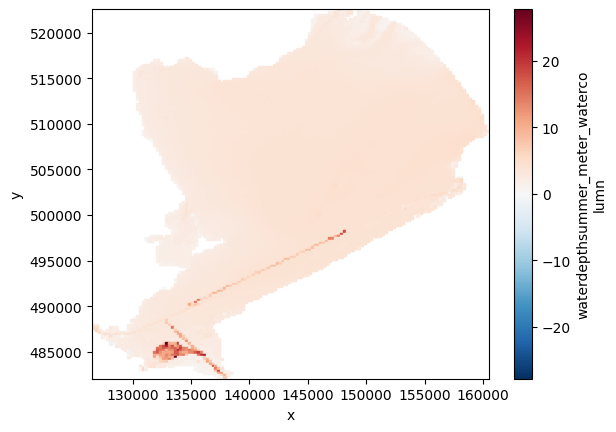

In [6]:
#visualize results
with xu.open_mfdataset("example_output_data/"+ds_out) as result:
    result["waterdepthsummer_meter_watercolumn"].ugrid.plot()
